<span style="color:#44f;font-weight:bold;">Codes for CNS2025: Lecture 2</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Importing modules or sub-modules allow extending the functionality of python. Namespace can prevent collision of identifiers but can be cumbersome sometimes. Another way to remove namespace is to use, for example,
```python
from numpy import arange
```

## Array and operation in `numpy`

In [2]:
range(10) # An iterable

range(0, 10)

An iterable is any object capable of returning its members one at a time, allowing it to be iterated over in a loop. Common examples of iterables include lists, tuples, strings, and dictionaries.

`range` is an iterable object. It doesn't not include the specified end point.

In [3]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Not like `range` being a special object, `numpy.arange` is just an array. 

In [4]:
list(range(10)) # Conversion to a list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
np.linspace(0,9,10)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

`numpy.linspace` has `endpoint=True` by default

In [6]:
x = np.arange(-4,4.01,1.0)
y = x**2
print(f'x: {x}\ny: {y}')

x: [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
y: [16.  9.  4.  1.  0.  1.  4.  9. 16.]


`numpy.array` operations are element-wise

## Plotting basics with `matplotlib.pyplot`

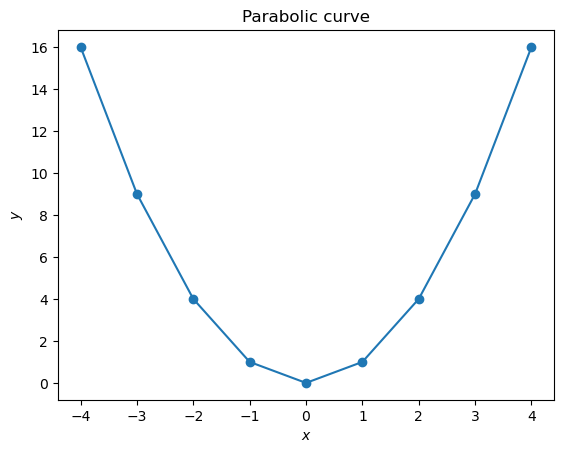

In [7]:
plt.figure()
plt.plot(x,y,'o-')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Parabolic curve')
plt.show()

⚡ There is an alternative way of plotting in `matplotlib.pyplot`: throught the `Axes` object, e.g., returned by `plt.subplots()`.

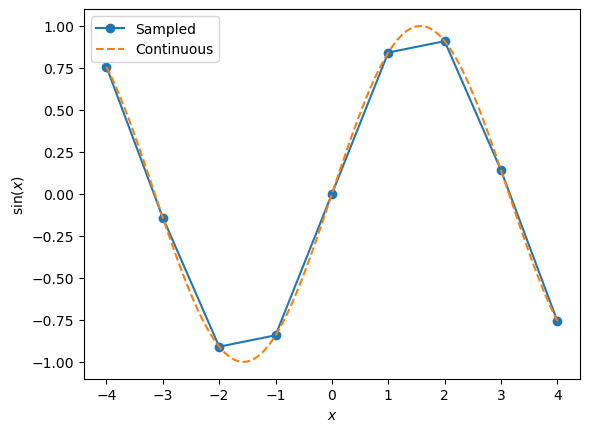

In [8]:
f,a = plt.subplots()
a.plot(x,np.sin(x),'o-',label='Sampled')
x_dense = np.linspace(x[0],x[-1],100)
a.plot(x_dense,np.sin(x_dense),'--',label='Continuous')
a.set_xlabel('$x$')
a.set_ylabel(r'$\sin(x)$')
a.legend()
plt.show()

## Random number generation

 * **Random generator**: A producer of random bits
 * **Distribution**: Transformer of random bits into numbers

In [9]:
rng = np.random.default_rng(1234) # Create a generator with fixed seed
print(rng)

Generator(PCG64)


In [10]:
rng.uniform(size=20)

array([0.97669977, 0.38019574, 0.92324623, 0.26169242, 0.31909706,
       0.11809123, 0.24176629, 0.31853393, 0.96407925, 0.2636498 ,
       0.44100612, 0.60987081, 0.8636213 , 0.86375767, 0.67488131,
       0.65987435, 0.7357577 , 0.22275366, 0.17206618, 0.87041497])

In [11]:
rng.integers(8,size=(20))

array([3, 0, 1, 5, 0, 5, 1, 4, 4, 0, 1, 7, 3, 3, 3, 4, 1, 0, 5, 2])

In [12]:
rng.poisson(size=100)

array([1, 2, 1, 1, 2, 3, 1, 0, 0, 2, 0, 2, 1, 1, 3, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 3, 1, 0, 0, 1, 0, 1, 0, 4, 0,
       0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 1])

Poisson distribution function:
$$ f(k) = \frac{\lambda^k e^{-\lambda}}{k!} $$
is a discrete distribution function on positive integers.

`numpy` functions generally can operate on arrays. But for other functions, we can use `numpy.vectorize` to make it capable of that.

In [13]:
from math import factorial

In [14]:
fac = np.vectorize(factorial)

Here we can use the `fac` to turn the above mathematical equation into python code.

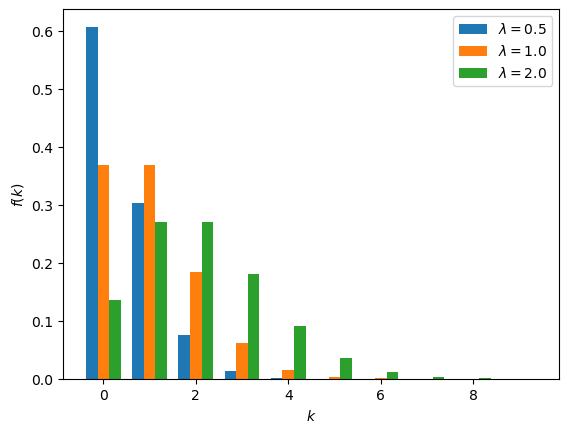

In [15]:
plt.figure()
k = np.arange(10)
for n,lam in enumerate([0.5,1.0,2.0]):
    plt.bar(
        k+(n-1)/4, # Positions
        lam**k*np.exp(-lam)/fac(k), # Heights
        width=.25, label=fr'$\lambda = {lam}$'
    )
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$f(k)$')
plt.show()

# Converting spike-count frame to firing-rate frame

We will first generate some ~~fake~~ artificial spike data to use as an example.

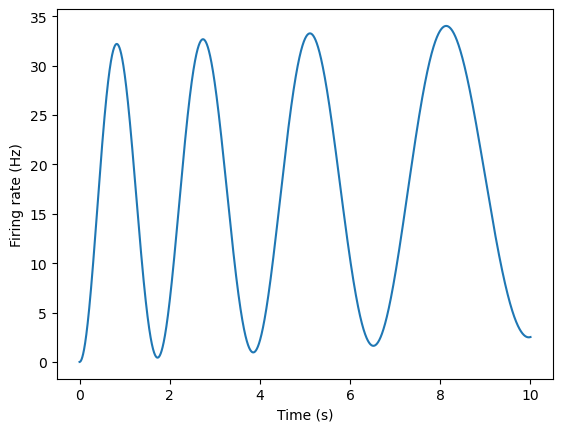

In [16]:
# Generate artificial rate data
delta_t = 0.0002 # Time beteen frames
times = np.arange(0,10,delta_t)
rates = 32*np.sin(2*times/(1+times/17))**2+times/4
# Show the rate
plt.plot(times,rates)
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.show()

In [17]:
# Generate spike-counts between adjacent frames from firing rate using Poisson process
rng = np.random.default_rng(1234)
spike_counts = rng.poisson(rates*delta_t)

In this case, the maximum spike count in all the bins is 1. This can be expected if `dt` is small enough. (If there happen to be a frame of 2 or more spikes, try changing the random seed and repeating the drawing.)

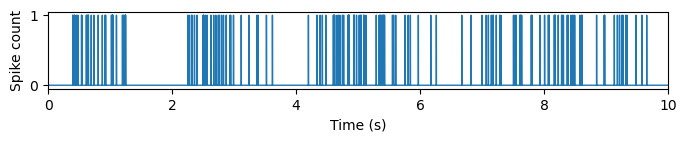

In [18]:
plt.figure(figsize=(8,1))
plt.plot(times,spike_counts,lw=1)
plt.xlim(0,10)
plt.xlabel('Time (s)')
plt.ylabel('Spike count')
plt.show()

## Rates from fixed-size bins

* bin size: $\Delta_\mathrm{bin}$
* Time $t$ to bin index $i$: $$i = \lfloor t/\Delta_\mathrm{bin} \rfloor$$

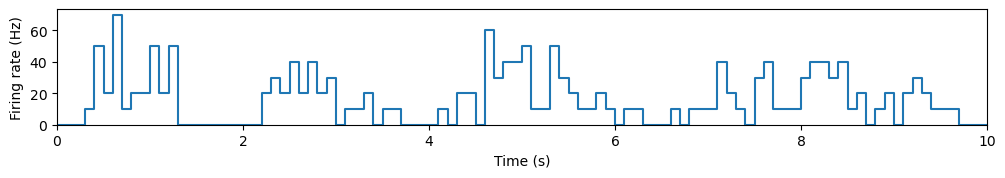

In [19]:
bin_size = 0.1
bin_spike_counts = np.zeros(int(10/bin_size)+1)
for t,s in zip(times, spike_counts):
    bin_spike_counts[int(t/bin_size)] += s
plt.figure(figsize=(12,1.5))
plt.step(
    (np.arange(len(bin_spike_counts)))*bin_size,
    bin_spike_counts/bin_size,where='post')
plt.xlim(0,10)
plt.ylim(0,None)
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.show()

## Rates from sliding windows

Rate is estimated in all possible positions with windows that can overlap each other. For rate at `t` the window is from `t-win_size/2` to `t+win_size/2`.

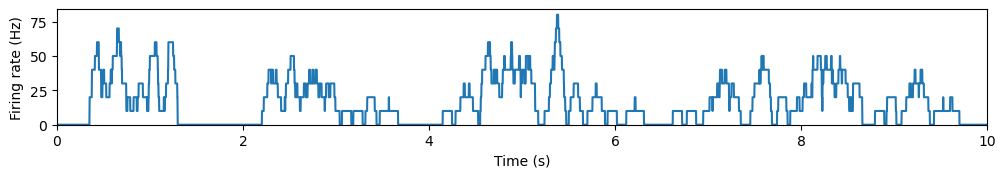

In [20]:
win_size = 0.1 # Size of sliding window
time_resolution = 0.001 # Spacing of time points
win_times = np.arange(0,10,time_resolution) # Time points
win_spike_counts = np.zeros(len(win_times)) # Spike counts in window
for t,s in zip(times, spike_counts): # Spike time
    # Find index range [i0,i1) of windows overlap the time
    i0 = max(0,int((t-win_size/2)/time_resolution))
    i1 = min(len(win_times),int((t+win_size/2)/time_resolution))
    win_spike_counts[i0:i1] += s
plt.figure(figsize=(12,1.5))
plt.plot(win_times,win_spike_counts/win_size)
plt.xlim(0,10)
plt.ylim(0,None)
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.show()

## Convolution with any window function

### The `numpy.convolve` function

In [21]:
np.convolve([1,2,3,4,5,6,7,8],[1,2,3])

array([ 1,  4, 10, 16, 22, 28, 34, 40, 37, 24])

These numbers come from:

 * $1 = 1*1$
 * $4 = 2*1 + 1*2$
 * $10 = 3*1 + 2*2 + 1*3$
 * $16 = 3*2 + 2*3 + 1*4$
 * ...
 * $37 = 3*7 + 2*8$
 * $24 = 3*8$

The size of the resulting array will be the sum of sizes of the two arrays minus 1 this if from the default parameter `mode='full'`.

There are two possible modes of boundary condition: `same` and `valid`

### Make a *kernel* or *window function*

In [22]:
delta_t

0.0002

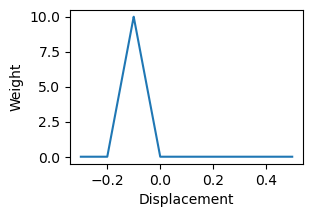

In [23]:
plt.figure(figsize=(3,2))
# Some arbitrary window function
def triangle_func(times,w):
    t = times+w
    return (t>-w)*(t<w)*(w-np.abs(t))
win_times = np.arange(-0.3,0.5,delta_t)
win_kernel = triangle_func(win_times,0.1)
win_kernel /= (delta_t*win_kernel.sum()) # Normalize
plt.plot(win_times,win_kernel)
plt.xlabel('Displacement')
plt.ylabel('Weight')
plt.show()

Using `np.convolve`, the overlaps of two arrays are element-wise multiplied and summed up at different displacements along opposite directions. The returned array contains the sums indexed by the displacements. The full range of none-zero overlap is returned by default.

Since `np.convolve` orients two arrays in opposite directions, we need to reverse the direction of our window array `wkl` when we use it to calculate the windowed local average of the target data array. Since the reference point of the window array can be anywhere, we need to find it out by looking at the range array `x` of the window. We then can drop the corresponding parts from the beginning and end of the `np.convolve` results for a proper alignment.

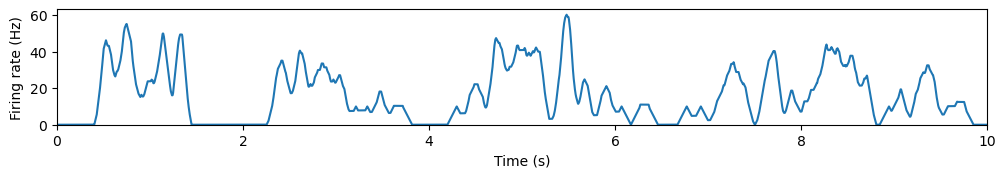

In [24]:
front_drop = (win_times>0).sum() # Number of points to be dropped from the front
estimated_rates = np.convolve(
    spike_counts,
    win_kernel[::-1]
)[front_drop:-len(win_kernel)+1+front_drop]

plt.figure(figsize=(12,1.5))

plt.plot(times, estimated_rates) # remove wkn//2 from beg
plt.xlim(0,10)
plt.ylim(0,None)
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.show()

## Some tricky point on numerical error

In [25]:
int(1/delta_t)

5000

In [26]:
t = 0
for i in range(int(1/delta_t)):
    t += delta_t
print(t==1)

False


This can be worked around using numbers with finite binary representation. 

In [27]:
delta_t = 2**-13
print(delta_t)

0.0001220703125


In [28]:
t = 0
for i in range(int(1/delta_t)):
    t += delta_t
print(t==1)

True


# Other illustrations for lecture

## Place cells

In [29]:
def gaussian_func(x,a,sigma=1.0):
    return np.exp(-((x-a)/sigma)**2/2)

In [30]:
xs = np.linspace(-5,5,1000)

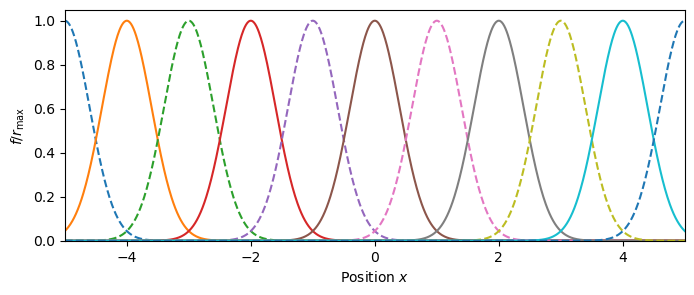

In [31]:
f = np.zeros_like(xs) # Accumulator to total response
plt.figure(figsize=(8,3))
for sa in np.arange(-5,6): # Different tuning curve centers
    f_sa = gaussian_func(xs,sa,sigma=.4) # Response of turning curve centers at `sa`
    plt.plot(xs,f_sa,'--' if sa%2 else '-')
    f += f_sa
#plt.plot(xs,f/5,color='gray',)
plt.ylim(0,)
plt.xlim(-5,5)
plt.xlabel('Position $x$')
plt.ylabel(r'$f/r_\max$')
plt.show()

## Plot tuning curve

In [32]:
# Tuning curve data
with np.load('lec02-data.npz') as f:
    print(list(f))
    tuning_curve = f['tuning']
    spikes = f['spikes']

['tuning', 'spikes']


In [33]:
print(tuning_curve.shape)
print(spikes.shape)

(31, 2)
(117,)


In [34]:
# Fitting function
def fit_function(x,a,s):
    return a*np.exp(-0.5*(x/s)**2)

In [35]:
x_range = np.linspace(-45,45,257)

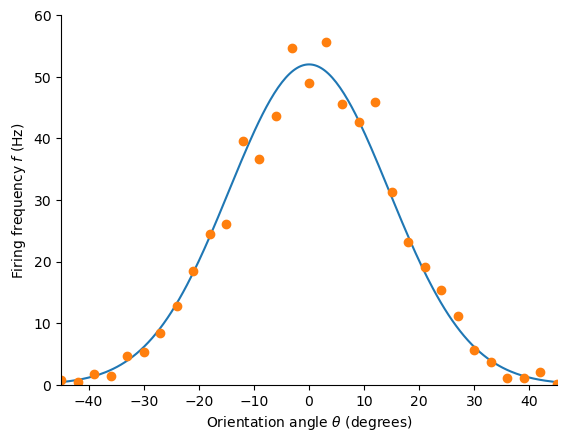

In [36]:
f,a = plt.subplots() # Another way of making plot
a.plot(x_range,fit_function(x_range,52,14.5))
a.plot(tuning_curve[:,0],tuning_curve[:,1],'o')
# a.plot(*tuning.T,'o') # Same as above line
a.set_xlim(-45,45)
a.set_ylim(0,60)
a.set_xlabel(r'Orientation angle $\theta$ (degrees)')
a.set_ylabel('Firing frequency $f$ (Hz)')
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
plt.show()

## Plot spike train

In [37]:
min(spikes),max(spikes)

(np.float64(0.000521843618462527), np.float64(3.2521371998423065))

In [38]:
t_end = 3.0 # Will only consider t_i<t_end
bin_size = 0.1 # Bin size
bin_counts = np.zeros(int(t_end/bin_size)) # Binned counts
for t in spikes:
    if t>=t_end: continue
    bin_counts[int(t/bin_size)] += 1
times_1 = np.concatenate([(i,i+1) for i in range(len(bin_counts))])*bin_size
rates_1 = np.c_[bin_counts,bin_counts].flatten()/bin_size

In [39]:
def sliding_window(time_points, win_size=10):
    '''calculate sliding window time histogram on spike time points
 
    Parameters
    ----------
    time_points:  array time points
    win_size: window size
    '''
    win_time = time_points[0]-win_size
    i0 = 0
    i1 = 0
    lt = len(time_points)
    times = [win_time]
    rates = [0]
    while i0<lt:
        if i1<lt and time_points[i1]<time_points[i0]+win_size:
            if win_time<time_points[i1]-win_size: # output only when window moves
                time_next = time_points[i1]-win_size
                if rates[-1]==i1-i0: times[-1] = time_next # merge with previous interval
                else:
                    times.extend((win_time,time_next))
                    rates.extend((i1-i0,i1-i0))
                win_time = time_next
            i1 += 1
        else:
            if win_time<time_points[i0]: # output only when window moves
                time_next = time_points[i0]
                if rates[-1]==i1-i0: times[-1] = time_next # merge with previous interval
                else:
                    times.extend((win_time,time_next))
                    rates.extend((i1-i0,i1-i0))
                win_time = time_next
            i0 += 1
    times.append(win_time)
    rates.append(0)
    return np.array(times)+win_size/2,np.array(rates)/win_size

win_size = 0.1 # Window size
times_2,rates_2 = sliding_window(spikes, win_size)
w2 = times_2<t_end # For filtering out t>=t_end part

In [40]:
def gau_win(x_points,sigma):
    '''Gaussian window function with sigma as STD
    
    Parameters
    ----------
    x_points :  Positions
       sigma :  Standard deviation
    '''
    return np.exp(-(x_points/sigma)**2/2)/(np.sqrt(2*np.pi)*sigma)

times_3 = np.arange(0,3,0.01)
rates_3 = np.array([gau_win(t-spikes,win_size).sum() for t in times_3])

In [41]:
def cau_win(x_points,win_width):
    '''Causal window function with a width
    
    Parameters
    ----------
     x_points :  Positions
    win_width :  Width of causal window
    '''
    return (x_points>0)*x_points*np.exp(-x_points/win_width)/win_width**2

times_4 = times_3
rates_4 = np.array([cau_win(t-spikes,win_size).sum() for t in times_4])

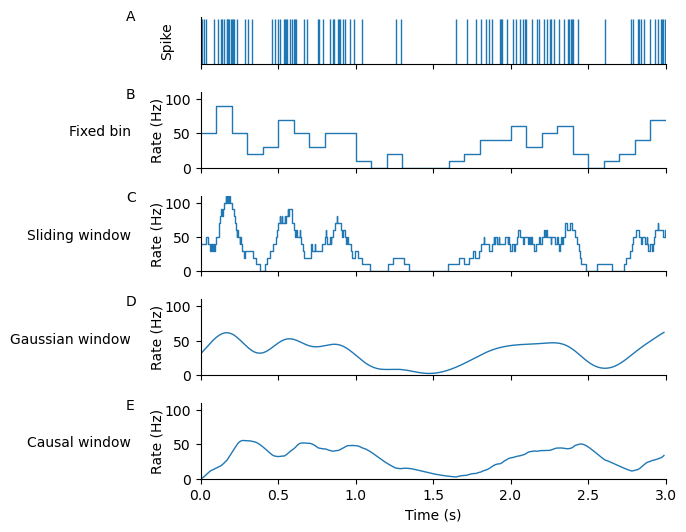

In [42]:
f,aa = plt.subplots( # We will make five plots together
    5,figsize=(6,6),sharex=True,
    gridspec_kw={'height_ratios':[1,1.6,1.6,1.6,1.6]}
)
plt.subplots_adjust(hspace=0.4) # Adjust the spacing a little
for a,i in zip(aa,['A','B','C','D','E']):
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.text(-0.16,0.92,i,transform=a.transAxes)

# Draw the spike train    
a = aa[0]
a.vlines(spikes,0,1,lw=1)
a.set_yticks([])
a.set_ylim([0,None])
a.set_ylabel('Spike',labelpad=19)
a.set_xlim(0,t_end)

# Fixed binning
a = aa[1]
a.plot(times_1,rates_1,lw=1)

# Sliding window
a = aa[2]
a.plot(times_2[w2],rates_2[w2],lw=1)

# Gaussian window
a = aa[3]
a.plot(times_3,rates_3,lw=1)

# Causal window
a = aa[4]
a.plot(times_4,rates_4,lw=1)
a.set_xlabel('Time (s)')
# Show labels and adjust y-axes
for a,tt in zip(aa[1:],['Fixed bin','Sliding window','Gaussian window','Causal window']):
    a.set_ylabel('Rate (Hz)',labelpad=0)
    a.set_yticks([0,50,100])
    a.set_ylim([0,110])
    a.text(-0.15,0.42,tt,transform=a.transAxes,ha='right')
plt.show()

In [43]:
# This is a python generator
def gen_spike_upto(time_limit, refractory_period=0):
    x = 0
    while x<time_limit:
        x += rng.exponential()+refractory_period
        yield x 

In [44]:
rng = np.random.default_rng(123)
spikes = np.array([t for t in gen_spike_upto(10,0.1)])

In [45]:
from scipy.stats import norm

In [46]:
x = np.linspace(0,10,10001)
rho = np.zeros_like(x)
num = np.zeros_like(x)
for t in spikes:
    rho += norm.pdf(100*(x-t))
    num += norm.cdf(100*(x-t))

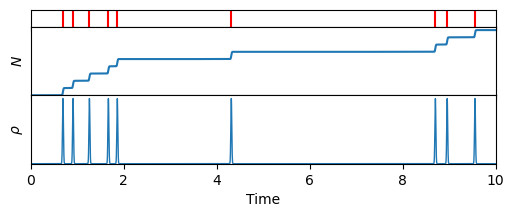

In [47]:
f,aa = plt.subplots(
    3,1,figsize=(6,2),sharex=True,
    gridspec_kw={'height_ratios':[.5,2,2]}
)
f.subplots_adjust(hspace=0)
aa[0].vlines(spikes,0,1,color='r')
aa[0].set_yticks([])
aa[0].set_ylim(0,1)
#aa[1].plot(spikes,range(len(spikes)),drawstyle='steps')
aa[1].plot(x,num)
aa[1].set_ylim(0,None)
aa[1].set_yticks([])
aa[1].set_ylabel('$N$')
aa[2].plot(x,rho,lw=1)
aa[2].set_yticks([])
aa[2].set_ylim(0,None)
aa[2].set_ylabel(r'$\rho$')
plt.xlim(0,10)
plt.xlabel('Time')
plt.show()

<div style="color:#a00;font-size:140%;">

⚡ Following codes are for your reference, you may skip them if they don't seem comprehensible.
</div>

# Data for homework

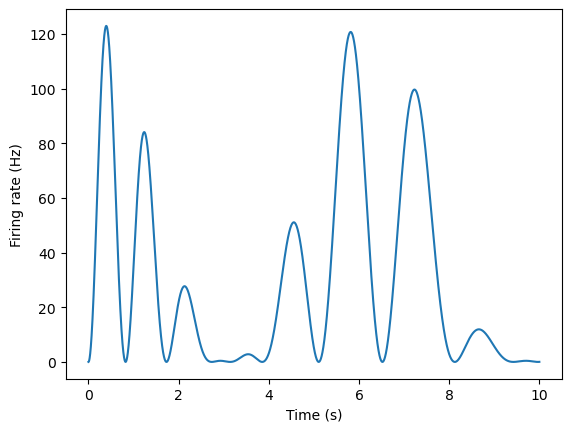

In [48]:
# Generate artificial rate data
times = np.arange(0,10,delta_t)
rates = 64*np.sin(4*times/(1+times/17))**2*(np.cos(times)+1)
# Show the rate
plt.plot(times,rates)
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.show()

In [49]:
def gen_spikes(r,dt,rng=None):
    '''generate spike train from Poisson rate

    Parameters
    ----------
    r:  array of spike rates
    dt: time step
    '''
    i = 0
    s = 0
    spikes = []
    if rng is None: rng = np.random.default_rng(123)
    while True:
        s += rng.exponential()
        while s>r[i]*dt:
            s -= r[i]*dt
            i += 1
            if i>=len(r): break
        else:
            spikes.append(i*dt+s/r[i])
            continue
        break
    return np.array(spikes)

In [50]:
spikes = gen_spikes(rates,delta_t)

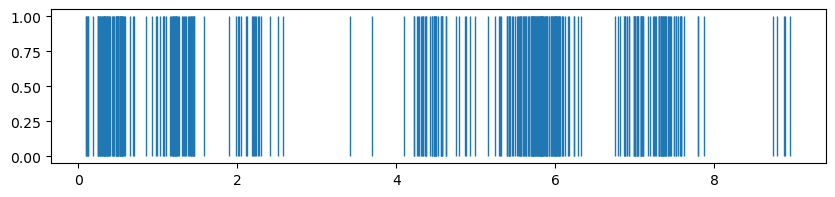

In [51]:
plt.figure(figsize=(10,2))
plt.vlines(spikes,0,1,lw=1)
plt.show()

In [52]:
from IPython.display import Markdown

In [53]:
Markdown(f'{len(times)} frames from $t={times[0]}$ to $t={times[-1]}$')

81920 frames from $t=0.0$ to $t=9.9998779296875$

In [54]:
frames = np.zeros_like(times)
for t in spikes: frames[int(t/delta_t)] = 1

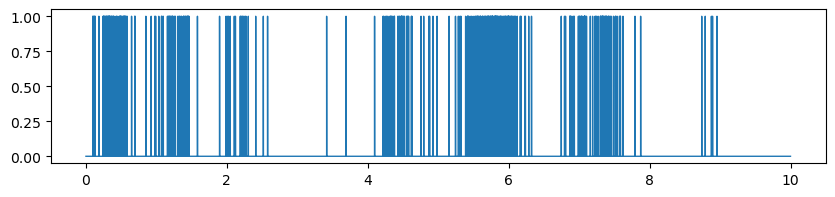

In [55]:
f = plt.figure(figsize=(10,2))
plt.plot(times,frames,lw=1)
plt.show()

In [56]:
np.savez('hw02-data.npz',spikes=spikes,frames=frames,delta_t=delta_t)

In [57]:
with np.load('hw02-data.npz',allow_pickle=True) as f:
    print(list(f))
    dt = f['delta_t'][()]

['spikes', 'frames', 'delta_t']


## Plots for homework

### Square window

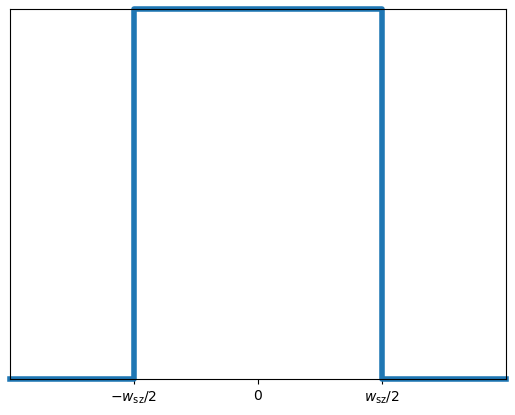

In [58]:
plt.plot([-2,-1,-1,1,1,2],[0,0,1,1,0,0],lw=4,clip_on=False)
plt.xlim(-2,2)
plt.xticks([-1,0,1],[r'$-w_\mathrm{sz}/2$',0,r'$w_\mathrm{sz}/2$'])
plt.ylim(0,1)
plt.yticks([])
plt.savefig('hw02_f1.svg',transparent=True,bbox_inches='tight')
plt.show()

### Gaussian window

In [59]:
σₜ = 0.1
t_values = np.linspace(-5*σₜ,5*σₜ,257)

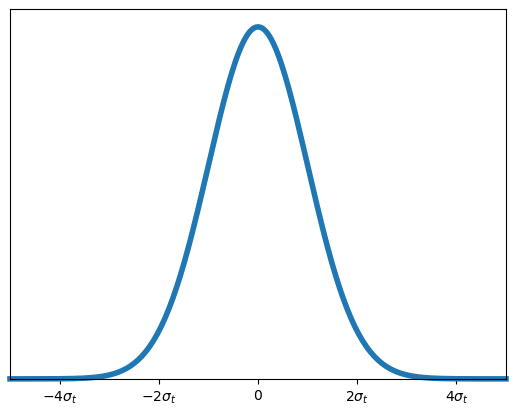

In [60]:
plt.plot(t_values,np.exp(-t_values**2/(2*σₜ**2))/(np.sqrt(2*np.pi)*σₜ),lw=4,clip_on=False)
plt.xlim(t_values[0],t_values[-1])
plt.xticks([-4*σₜ,-2*σₜ,0,2*σₜ,4*σₜ],[r'$-4\sigma_t$',r'$-2\sigma_t$','$0$',r'$2\sigma_t$',r'$4\sigma_t$'])
plt.ylim(0,None)
plt.yticks([])
plt.savefig('hw02_f2.svg',transparent=True,bbox_inches='tight')
plt.show()

### Causal window

In [61]:
α = 1/0.1
t_values = np.linspace(-10/α,5/α,257)

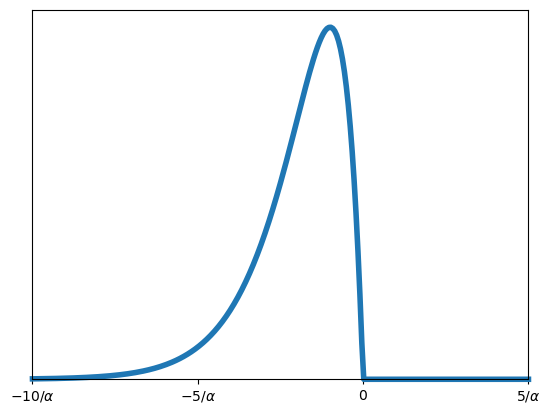

In [62]:
plt.plot(t_values,-α**2*t_values*np.exp(α*t_values)*(t_values<0),lw=4,clip_on=False)
plt.xlim(t_values[0],t_values[-1])
plt.xticks([-10/α,-5/α,0,5/α],[r'$-10/\alpha$',r'$-5/\alpha$',r'$0$',r'$5/\alpha$'])
plt.ylim(0,None)
plt.yticks([])
plt.savefig('hw02_f3.svg',transparent=True,bbox_inches='tight')
plt.show()

<hr>
<address style="color:#44f;font-style:italic;font-weight:bold;"><a href="https://cc.tir.tw/wk/2025cns">CNS2025</a></address>